In [2]:
! pip install transformers

     |████████████████████████████████| 3.8 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 39.6 MB/s 
     |████████████████████████████████| 6.5 MB 20.4 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import nltk
from google.colab import drive
import re
import en_core_web_sm
import tensorflow as tf
from transformers import pipeline

In [14]:
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [5]:
nlp = spacy.load("en_core_web_sm")

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
#reading data file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/full_tag_extracted_results.csv")

In [ ]:
data.head()

,Unnamed: 0,id,resourceLink,tags,paragraph,external,benefit,industry,country
0,0,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...","This past year, we extended this ethos not onl...",['test'],sustainable,supermarkets,Mexico
1,1,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...",We’re helping to grow healthier agriculture co...,['test'],sustainable,supermarkets,Mexico
2,2,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...",supply is available and U.S. Food and Drug \nI...,['test'],sustainable,supermarkets,Mexico
3,3,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...",We will be rolling out an employee engagement ...,['test'],sustainable,supermarkets,Mexico
4,4,00050113-88d0-5767-b12f-66fac7c3b80d.json,https://www.delmontefoods.com/sites/default/fi...,"{'external': ['test'], 'benefit': 'sustainable...","Board twice a year. Our ESG reports, including...",['test'],sustainable,supermarkets,Mexico


In [7]:
data.shape

(725284, 9)

In [8]:
data['industry'].value_counts()

floristry         159503
iron              158917
Life Insurance    112288
supermarkets      110404
steel             106052
fashion            78120
Name: industry, dtype: int64

In [9]:
data['country'].value_counts()

Singapore    101836
Ecuador       87459
Peru          75172
Colombia      71045
Mexico        70250
Spain         61050
UK            57036
Canada        53021
Italy         51702
France        49706
Germany       47007
Name: country, dtype: int64

In [10]:
#selecting only the fashion industry from country UK
data_uk_fashion = data[(data['industry'] == 'fashion') & (data['country'] == 'UK')]

In [11]:
data_uk_fashion.shape

(6988, 9)

In [12]:
#copying the dataframe
df = data_uk_fashion.copy()

In [13]:
df.head()

,Unnamed: 0,id,resourceLink,tags,paragraph,external,benefit,industry,country
99649,99649,cc559215-afa8-5109-8cda-dffed55feeac.json,http://oro.open.ac.uk/77120/3/77120.pdf,"{'external': ['test'], 'benefit': 'sustainable...","Black, sandy; Williams, Dilys; Rocamora, Agnes...",['test'],sustainable,fashion,UK
99650,99650,cc559215-afa8-5109-8cda-dffed55feeac.json,http://oro.open.ac.uk/77120/3/77120.pdf,"{'external': ['test'], 'benefit': 'sustainable...",Copyright and Moral Rights for the articles on...,['test'],sustainable,fashion,UK
99651,99651,cc559215-afa8-5109-8cda-dffed55feeac.json,http://oro.open.ac.uk/77120/3/77120.pdf,"{'external': ['test'], 'benefit': 'sustainable...","of the UK’s creative industries, and widely re...",['test'],sustainable,fashion,UK
99652,99652,cc559215-afa8-5109-8cda-dffed55feeac.json,http://oro.open.ac.uk/77120/3/77120.pdf,"{'external': ['test'], 'benefit': 'sustainable...",Such small and agile enterprises exemplify a r...,['test'],sustainable,fashion,UK
99653,99653,cc559215-afa8-5109-8cda-dffed55feeac.json,http://oro.open.ac.uk/77120/3/77120.pdf,"{'external': ['test'], 'benefit': 'sustainable...",2 “The crisis is a catalyst that will shock th...,['test'],sustainable,fashion,UK


In [98]:
class Zero_shot_classifier:
  """
  This class is about classfying the content according to the labels user want to define

  """

  def __init__(self,dataframe,industry,country):
    """
    dataframe ------>dataframe -  full_tag_extracted_results.csv(compulsory)
    industry  ------>string    -  one of this ["floristry","iron","Life Insurance","supermarkets","steel","fashion"]
    country   ------>string    -  one of this ["Singapore","Ecuador","Peru","Colombia","Mexico","Spain","UK","Canada","Italy","France","Germany"]

    data will be filtered according to the useer defined indutry and country.
    Then paragraphs of the dataframe will be preprocessed - removing links, removing stopwords, lemmatizing etc
    """
    #chossing releavnt data according to the country and industry
    self.__df = dataframe[(dataframe['industry'] == industry) & (dataframe['country'] == country)]
    print("\n shape of the data set {}".format(self.__df.shape))
    content = self.__df['paragraph'].tolist()
    print("\n Number of sentences to preprocess {}\n".format(self.__df.shape[0]))
    self.__pre_content = list(map(self.__preprocessor, content))
    print("Preprocessing completed")


  def __preprocessor(self,text):
    #Removing weblinks
    text = text.lower()
    text = re.sub(r"\n", "",text)
    text = re.sub(r'http://www.\w+.org/','', text)
    text = re.sub(r'http://www.([\w\S]+).org/\w+\W\w+','',text)
    text = re.sub(r'https://\w+.\w+/\d+.\d+/\w\d+\W\w+','',text)
    text = re.sub(r'https://\w+.\w+/\d+.\d+/\w\d+\W\w+','',text)
    text = re.sub(r'Figure\s\d:','', text)
    text = re.sub(r'\Wwww.\w+\W\w+\W','',text)
    text = re.sub("@[A-Za-z0-9]+", "", text)
    text = re.sub(r'www.\w+','',text)

    #Removing emojis
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub('', text)

    #removing stopwords and lemmatizing results
    text = [token.lemma_ for token in nlp(text) if not (token.is_stop or token.is_punct or token.like_num or (len(token) == 1))]
    text = " ".join(text)
    return text

  def classifier(self, labels, path_to_save = None, save = False ):
    """
    labels ------> List of labels which the sentences to be classified
    save   ------> Bool - If True, a csv file containing with labels and probabilites will be saved
    path_to_save ----> Specify a path to save the csv file. Specify only if the save is True
                       Ex: /content/drive/MyDrive/Colab Notebooks/

    Content will be classified according to the labels defined using zero shot classifer
    
    """
    classified_labels = []
    probability = []
    #classifying the sentences
    for index,sentence in enumerate(self.__pre_content):
      classification = classifier(sentence,labels)
      classified_labels.append(classification['labels'][0])
      probability.append(classification['scores'][0])
      if(index%10 ==0):
        print(f"Clasified {index} sentences")

    #attaching classified labels to dataframe
    self.__df['probability'] = probability
    self.__df['label'] = classified_labels

    if save:
      self.__df.to_csv(path_to_save + "zero_shot_classifier.csv", index = False)
      print("CSV FILE SUCCESSFULLY SAVED TO DRIVE")

    return self.__df

  def classification_analysis(self):
    """
    Analysis of labels classified.
    """
    print("\n Labels counts\n")
    print(self.__df['label'].value_counts())
    print("\n")
    print("\nLabel Frequency Graph\n")

    #frequencies of labels
    sns.set_theme()
    sns.countplot(x = d1['label'], palette=[(0.2,0.3,0.6),(0.8,0.5,0.6)])
    plt.xlabel("Classification_labels")
    plt.ylabel("Frequency")
    plt.xticks(rotation = 45)
    plt.title("classified labels and their frequencies")
    plt.show()

    print("\nmean probability value of the classification with confidence intervals\n")

    #mean probability value of the classification with confidence intervals
    sns.catplot(data = d1, x= 'label', y = 'probability', kind = 'bar',ci = 99, aspect = 1.5, height = 5)



In [95]:
z1 = Zero_shot_classifier(data,'fashion','UK',)


 shape of the data set (6988, 9)

 Number of sentences to preprocess 6988

Preprocessing completed


In [97]:
path = "/content/drive/MyDrive/Colab Notebooks/"
d1 = z1.classifier(['sustainability','business'], path_to_save=path, save=True)
d1.head()


 Labels counts

sustainability    6
business          4
Name: label, dtype: int64



Label Frequency Graph



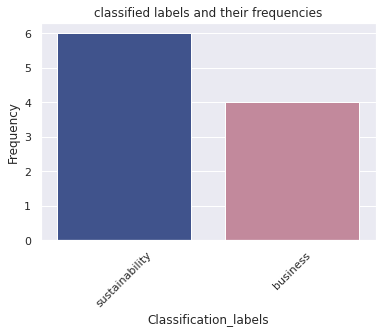


mean probability value of the classification with confidence intervals



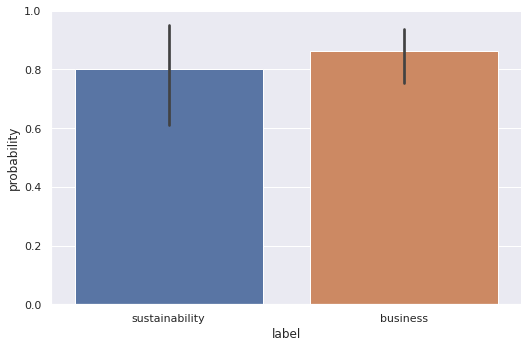

In [92]:
z1.classification_analysis()